# Group analysis of EEG data

## EEG analysis over multiple participants

author: Carina Forster

contact: forster@cbs.mpg.de

last updated 15.07.2024

Aim: how can we do statistics on group level EEG data?

In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import glob

In [2]:
mne.set_log_level('error')  # reduce extraneous MNE output

#### We are using data provided by [the neural data science in Python book](https://neuraldatascience.io/7-eeg/erp_group_viz.html)

In [3]:
# set up path to data
data_dir = Path("C:/", "Users", "Carina", "Desktop", "data_liverpool", "group_data")

In [4]:
# use glob package to get all files in directory
all_files = list(data_dir.glob("*"))  # This will get all files and directories

# Print the list of files
for file in all_files:
    print(file)

C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p01-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p02-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p03-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p04-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p05-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p06-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p07-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p08-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p09-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p10-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p11-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p12-ave.fif
C:\Users\Carina\Desktop\data_liverpool\group_data\sentence_n400_p13-ave.fif
C:\Users\Car

<div class="alert alert-block alert-success">
<b>Exercise:</b> 

What does the -ave.fif file contain?

According to MNE convetion the file ending should specify the data contained in the file. </br>
-ave contains data averaged over epochs for one participant

</div>

Experimental paradigm and hypothesis: 
People were provided with sentences that ended in either a semantically congruent word </br>
(e.g., I take my coffee with milk and sugar), </br>
or an incongruent word </br> (e.g., I take my coffee with milk and glass.). 

The researchers predicted an N400 effect, with a more negative ERP for incongruent words than congruent words: 

- significantly greater negativity between 400–600 ms
- largest over midline central-posterior channels (Cz, CPz, Pz) for incongruent words than congruent words

In [5]:
# define conditions
conditions = ['Control', 'Violation']

# loop over conditions and read in the data, save it in a dictionary called evokeds
evokeds = {}

# we also specify the montage here
for idx, c in enumerate(conditions):
    evokeds[c] = [mne.read_evokeds(d)[idx].set_montage('easycap-M1') for d in all_files]

evokeds

{'Control': [<Evoked | 'Control' (average, N=37), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=27), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=40), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=39), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=38), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=32), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=40), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=29), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=41), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=39), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=37), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=34), -0.1

### Let's check if there is a difference between conditions visually

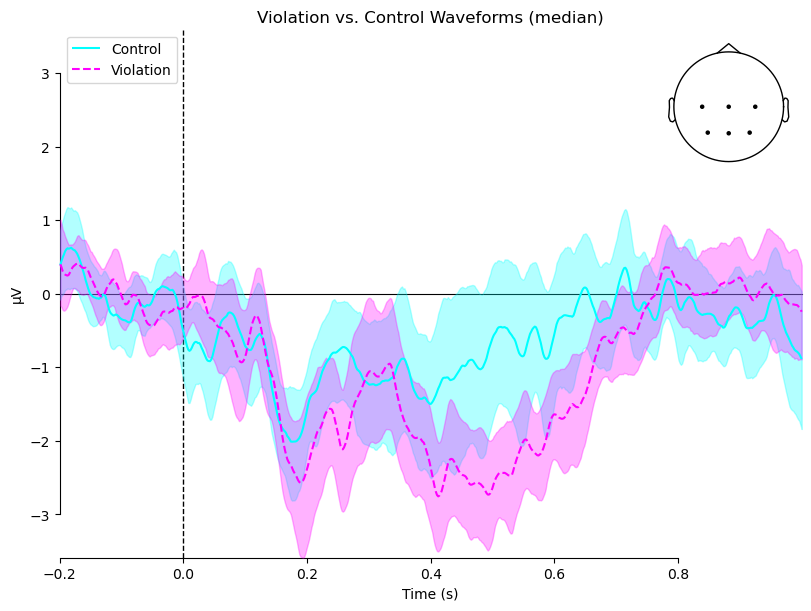

In [6]:
# Define ROI (Region of Interest), here centro-parietal channels
roi = ['C3', 'Cz', 'C4', 
       'P3', 'Pz', 'P4']

# set custom line colors and styles
color_dict = {'Control':'cyan', 'Violation':'magenta'}
linestyle_dict = {'Control':'-', 'Violation':'--'}

mne.viz.plot_compare_evokeds(evokeds,
                             combine='median',
                             legend='upper left',
                             picks=roi, show_sensors='upper right',
                             colors=color_dict,
                             linestyles=linestyle_dict,
                             title='Violation vs. Control Waveforms'
                            )
plt.show()

<div class="alert alert-block alert-success">
<b>Exercise:</b> 

Plot the difference between the two conditions.

</div>

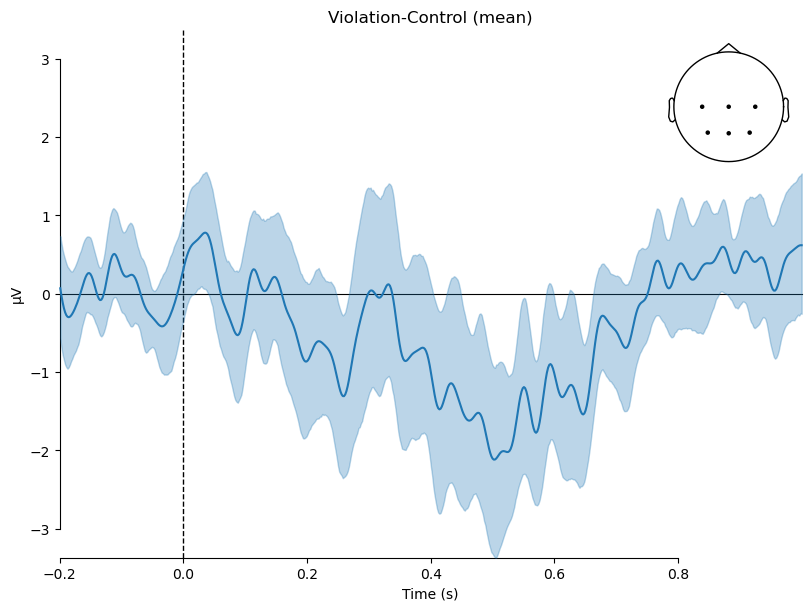

In [7]:
diff_waves = [mne.combine_evoked([evokeds['Violation'][subj], 
                                  evokeds['Control'][subj]
                                 ],
                                 weights=[1, -1]
                                 ) 
              for subj in range(len(all_files))
              ]

contrast = 'Violation-Control'
mne.viz.plot_compare_evokeds({contrast:diff_waves}, combine='mean',
                            legend=None,
                            picks=roi, show_sensors='upper right',
                            title=contrast
                            )
plt.show()

<div class="alert alert-block alert-warning">
<b>Discussion:</b> 

Is there a statistically significant difference? 

If yes, where and when? 

The 95 % Confidence Interval does not contain 0 around 500 ms post stimulus

</div>

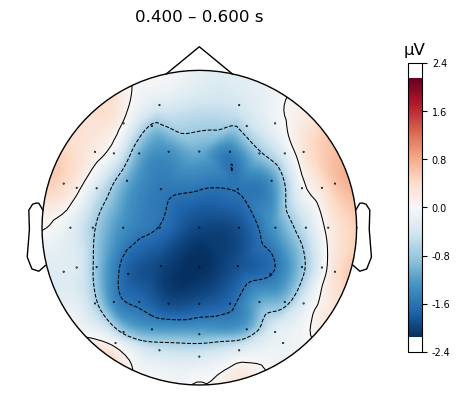

In [8]:
mne.viz.plot_evoked_topomap(mne.grand_average(diff_waves), 
                            times=.500, average=0.200, 
                            size=3
                           )
plt.show()

<div class="alert alert-block alert-warning">
<b>Discussion:</b> 

What can we conclude from the topomap?

Strongest negativity in centro-parietal channels

What are the times and average parameters for in the function?

We plot a 200 ms interval around 500 ms post stimulus

</div>

### What is a grand average?

A grand average is the average EEG signal over participants

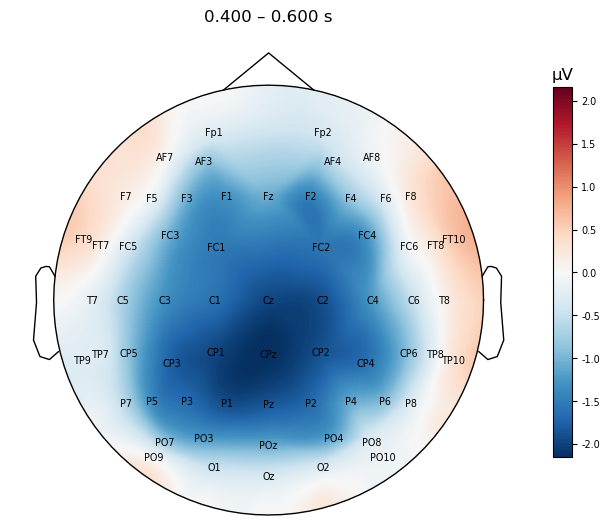

In [9]:
# made the plot a bit prettier
mne.viz.plot_evoked_topomap(mne.grand_average(diff_waves), 
                            times=.500, average=0.200, 
                            show_names=True, sensors=False,
                            contours=False,
                            size=4
                           );

# Everyone's favourite: Statistics 

Recommended reading on [how not to](https://doi.org/10.1111/psyp.12639) do statistics in EEG analysis

There are maaany ways to do statistics on EEG (high-dimensional) data. 

## 1. A priori t test (Univariate statistics)

In [10]:
# let's look at the difference waves again 
diff_waves

[<Evoked | 'Violation - Control' (average, N=18.246575342465754), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=12.98076923076923), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=20.0), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=18.986842105263158), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=19.0), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=16.716417910447763), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=19.487179487179485), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=14.5), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=20.24691358024691), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Con

In [11]:
# How do we get the data from this evoked object?
print(f'the data is of shape: {diff_waves[0].data.shape}')
print(f'the epoch start is: {diff_waves[0].tmin}')
print(f'the epoch end is: {diff_waves[0].tmax}')
print(f'the sampling rate is: {diff_waves[0].info["sfreq"]}')

the data is of shape: (64, 615)
the epoch start is: -0.19921875
the epoch end is: 1.0
the sampling rate is: 512.0


In [12]:
diff_waves[0].get_data().shape # shape of the data for the first participant, remember 0 indexing in Python

(64, 615)

In [14]:
# Extract data averaged over time
time_win = (.400, .600) 
roi = ('Cz', 'CPz', 'Pz')

y = np.array([np.mean(e.get_data(picks=roi, 
                                 tmin=time_win[0], 
                                 tmax=time_win[1]
                                 ),
                      axis=(1)) 
              for e in diff_waves
              ]
             )

# check shape of result
y.shape # should be participants x channels

(26, 3)

In [15]:
# Extract data averaged over time and channels

time_win = (.400, .600)
roi = ('Cz', 'CPz', 'Pz')

y_avg_channel_time = np.array([np.mean(e.get_data(picks=roi, 
                                 tmin=time_win[0], 
                                 tmax=time_win[1]
                                 ),
                      axis=(0,1)) 
              for e in diff_waves
              ]
             )

y_avg_channel_time.shape # should be participants

(26,)

<div class="alert alert-block alert-success">
<b>Exercise:</b> 

Explain the dimensions

First we average over time, thus we get a average for each channel

Second we average over time and channels, thus we only get a mean signal per participant

</div>

In [16]:
# scipy contains many statistical functions (t-tests, ANOVAs, etc.)
from scipy import stats 

# t-test against zero (averaged over channels)
t, pval = stats.ttest_1samp(y_avg_channel_time,0)

print('Difference t = ', str(round(t, 2)), 'p = ', str(round(pval, 4)))

Difference t =  -3.33 p =  0.0027


In [18]:
# t-test against zero (for each channel)
for i, ch in enumerate(roi):
    t, pval = stats.ttest_1samp(y[:,i],0)
    print(f'Channel {ch}: Difference t =  {str(round(t, 2))} p = {str(round(pval, 4))}')

Channel Cz: Difference t =  -3.23 p = 0.0035
Channel CPz: Difference t =  -3.56 p = 0.0015
Channel Pz: Difference t =  -2.93 p = 0.0071


<div class="alert alert-block alert-success">
<b>Exercise:</b> 

What was our hypothesis?

A difference in centro-parietal channels between 400 and 600 ms post stimulus

Is it okey to just run a t test for each channel?

Yes, but we need to correct for multiple comparisions otherwise we are p-hacking
</div>

### What if we don't have a ROI? Just do the same for 62 channel?

## 2. Mass univariate statistics

<div class="alert alert-block alert-success">
<b>Exercise:</b> 

Suppose we have no prior hypothesis about where and when the effect might happen:

We can do t tests for each channel and each timepoint:

How many possible combinations? 

</div>

In [21]:
print(f'{y.shape[0]} x {y.shape[1]} = {y.shape[0] ** y.shape[1]}')

26 x 3 = 17576


<div class="alert alert-block alert-warning">
<b>Discussion:</b> 

What is the multiple comparisions problem?  

Multiple comparisons arise when a statistical analysis involves multiple simultaneous statistical tests, each of which has a potential to produce a "discovery" => inflated false discovery rate (alpha level)

Solutions?

Bonferroni correction, FDR etc. 

Why might they be not useful for EEG data? 

EEG data at neighbouring sensors is not independent, the tests might be too conservative

</div>

We will look at a cluster-based permutation approach:

recommended literature: [Nichols & Holmes, 2001](https://doi.org/10.1002/hbm.1058)

We are now looking  at a very nice graphical approach to cluster permutation testing, created by [Benedikt Ehinger](https://benediktehinger.de/blog/science/statistics-cluster-permutation-test/)

The cluster statistics API is currently under revision by yours truly, I am trying to make it more userfriendly </br> 
and provide a nice plotting function. </br> 
Stay tuned.

In [22]:
from mne.stats import spatio_temporal_cluster_1samp_test

In [23]:
# Let's prep the data for the cluster permutation test
y = np.swapaxes(np.array([e.get_data() 
                          for e in diff_waves
                          ]
                         ),
                1, 2
                )

# check shape of result
y.shape

(26, 615, 64)

<div class="alert alert-block alert-success">
<b>Exercise:</b> 

Explain what we are doing here

channels have to be the last dimension for MNE cluster tests, thus we swap axes

Do you know a different approach?

np.reshape() would also work

</div>

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 412 stored elements and shape (64, 64)>

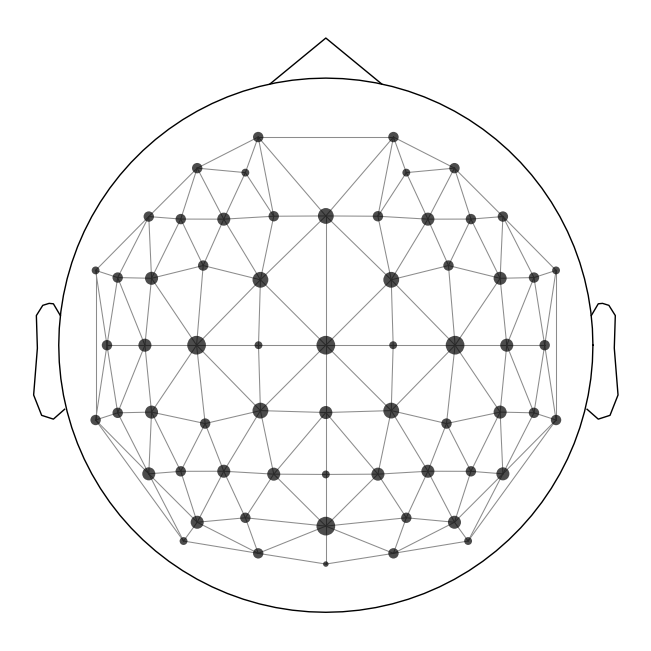

In [24]:
# Let's set up adjacency (how channels are connected) for the cluster permutation test
adjacency, ch_names = mne.channels.find_ch_adjacency(diff_waves[0].info, ch_type='eeg')
mne.viz.plot_ch_adjacency(diff_waves[0].info, adjacency, ch_names=ch_names);
adjacency

### Takes about 6 minutes on my machine, so be aware and prepare for getting a coffe

In [26]:
n_perm = 10000 # number of permutations

t_obs, clusters, cluster_pv, H0 = spatio_temporal_cluster_1samp_test( 
    y,
    adjacency=adjacency,
    n_permutations=n_perm, 
    out_type='mask',
    n_jobs=-1, 
    verbose='Info'
    )

Using a threshold of 2.059539


stat_fun(H1): min=-5.136169173085791 max=5.136169173085791
Running initial clustering …
Found 58 clusters


  0%|          | Permuting : 0/9999 [00:00<?,       ?it/s]

<div class="alert alert-block alert-success">
<b>Exercise:</b> 

How many clusters do we have?

How many of those are significant? 

</div>

In [27]:
print(f"the test detected {len(clusters)} clusters")

print(f'there is {len(np.where(cluster_pv < .05)[0])} significant cluster at a alpha level of .05')

the test detected 58 clusters
there is 1 significant cluster at a alpha level of .05


In [28]:
# find significant points across all clusters
mask_idx = np.where(cluster_pv < 0.05)[0]
mask = [clusters[idx] for idx in mask_idx]

# stats output is time X chan, but ERP data is chan X time, so transpose
mask = mask[0].T

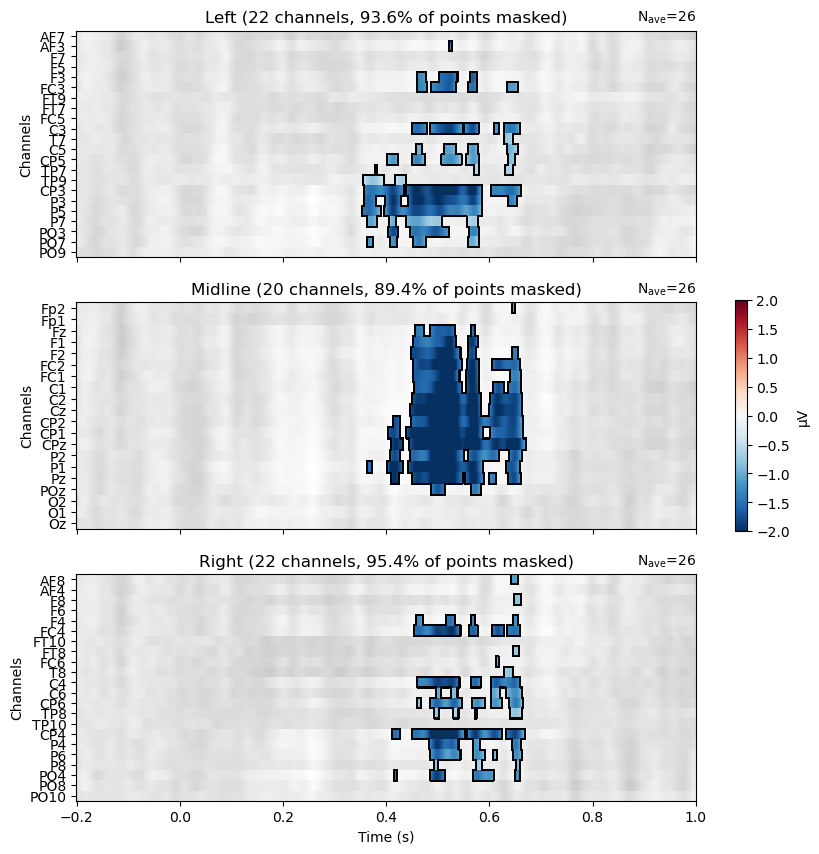

In [29]:
# Don't worry about the rather complex plotting code below, it's just to make the plot look nice but
# soon there should be a simpler way to plot this implemented in MNE

# Plot the cluster output
# Create ROIs by checking channel labels
selections = mne.channels.make_1020_channel_selections(diff_waves[0].info, midline="12z")
time_unit = dict(time_unit="s")

fig, axes = plt.subplots(nrows=3, figsize=(10, 10))
axes = {sel: ax for sel, ax in zip(selections, axes.ravel())}
mne.grand_average(diff_waves).plot_image(axes=axes,
                            group_by=selections,
                            colorbar=False,
                            show=False,
                            mask=mask,
                            show_names="all",
                            titles=None,
                            **time_unit,
                            clim = dict(eeg=[-2, 2])
                            )
plt.colorbar(axes["Left"].images[-1], ax=list(axes.values()), shrink=0.3, label="µV")

plt.show()


<div class="alert alert-block alert-info">
<b>Bonus:</b> 

Here is a different way of plotting the cluster permutation output


</div>

In [32]:
# run the cluster based permutation analysis with output type indices
# also we set a higher t-threshold to get a smaller cluster

cluster_stats = spatio_temporal_cluster_1samp_test(
    y,
    threshold=2.6,
    n_permutations=10000,
    n_jobs=-1,
    buffer_size=None,
    adjacency=adjacency,
    out_type= 'indices'
)

t_obs, clusters, p_values, _ = cluster_stats

In [34]:
print(f"the test detected {len(clusters)} clusters")

print(f'there is {len(np.where(p_values < .05)[0])} significant cluster at a alpha level of .05')

the test detected 49 clusters
there is 1 significant cluster at a alpha level of .05


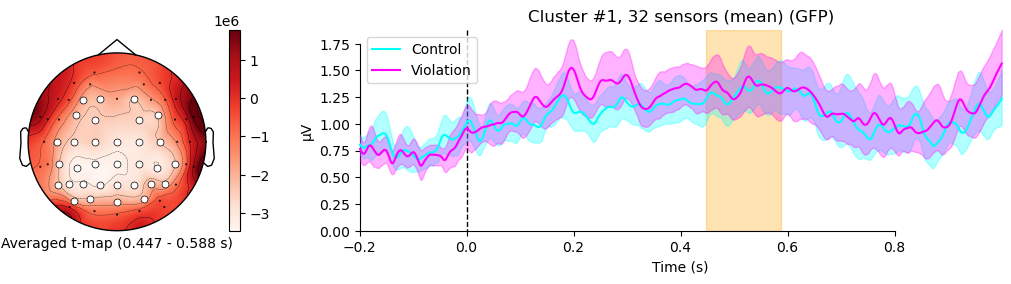

In [35]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# We subselect clusters that we consider significant at an arbitrarily
# picked alpha level: "p_accept".
# NOTE: remember the caveats with respect to "significant" clusters that
# we mentioned in the introduction of this tutorial!
p_accept = 0.05
good_cluster_inds = np.where(p_values < p_accept)[0]

# configure variables for visualization
colors = {"Control": "cyan", "Violation": "magenta"}
event_id = {}

# loop over clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    # unpack cluster information, get unique indices
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)

    # get topography for F stat
    t_map = t_obs[time_inds, ...].mean(axis=0)

    # get signals at the sensors contributing to the cluster
    sig_times = evokeds['Control'][0].times[time_inds]

    # create spatial mask
    mask = np.zeros((t_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # initialize figure
    fig, ax_topo = plt.subplots(1, 1, figsize=(10, 3), layout="constrained")

    # plot average test statistic and mark significant sensors
    t_evoked = mne.EvokedArray(t_map[:, np.newaxis], evokeds['Control'][0].info, tmin=0)
    t_evoked.plot_topomap(
        times=0,
        mask=mask,
        axes=ax_topo,
        cmap="Reds",
        vlim=(np.min, np.max),
        show=False,
        colorbar=False,
        mask_params=dict(markersize=10),
    )
    image = ax_topo.images[0]

    # remove the title that would otherwise say "0.000 s"
    ax_topo.set_title("")

    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # add axes for colorbar
    ax_colorbar = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        "Averaged t-map ({:0.3f} - {:0.3f} s)".format(*sig_times[[0, -1]])
    )

    # add new axis for time courses and plot time courses
    ax_signals = divider.append_axes("right", size="300%", pad=1.2)
    title = f"Cluster #{i_clu + 1}, {len(ch_inds)} sensor"
    if len(ch_inds) > 1:
        title += "s (mean)"
    mne.viz.plot_compare_evokeds(
        evokeds,
        title=title,
        picks=ch_inds,
        axes=ax_signals,
        colors=colors,
        show=False,
        split_legend=True,
        truncate_yaxis="auto",
    )

    # plot temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    ax_signals.fill_betweenx(
        (ymin, ymax), sig_times[0], sig_times[-1], color="orange", alpha=0.3
    )

plt.show()

## Now let's use Threshold-Free-Cluster-Enhancement (TFCE)

<div class="alert alert-block alert-warning">
<b>Discussion:</b> 

Why would we use TFCE?

the threshold to form a cluster is arbitrary but can change the results dramatically 

using TFCE you don't have to set a threshold, we test several thresholds and define a "clusteredness" value for each voxel

check out Benedikt Ehingers nice blog post on [TFCE](https://benediktehinger.de/blog/science/threshold-free-cluster-enhancement-explained/)

</div>

In [38]:
n_perm = 100 # number of permutations for the TFCE test, 
# less permutations => test is computationally more expensive, should be more for a real analysis

threshold_tfce = dict(start=0, step=0.2) # the lower the step size, the more sensitivity but also higher
# computational cost

t_tfce, clusters_tfce, cluster_pv_tfce, H0_tfce = spatio_temporal_cluster_1samp_test( 
    y, 
    threshold=threshold_tfce,
    adjacency=adjacency,
    n_permutations=n_perm, 
    out_type='mask',
    n_jobs=-1, # this uses all available cores on your machine
    )

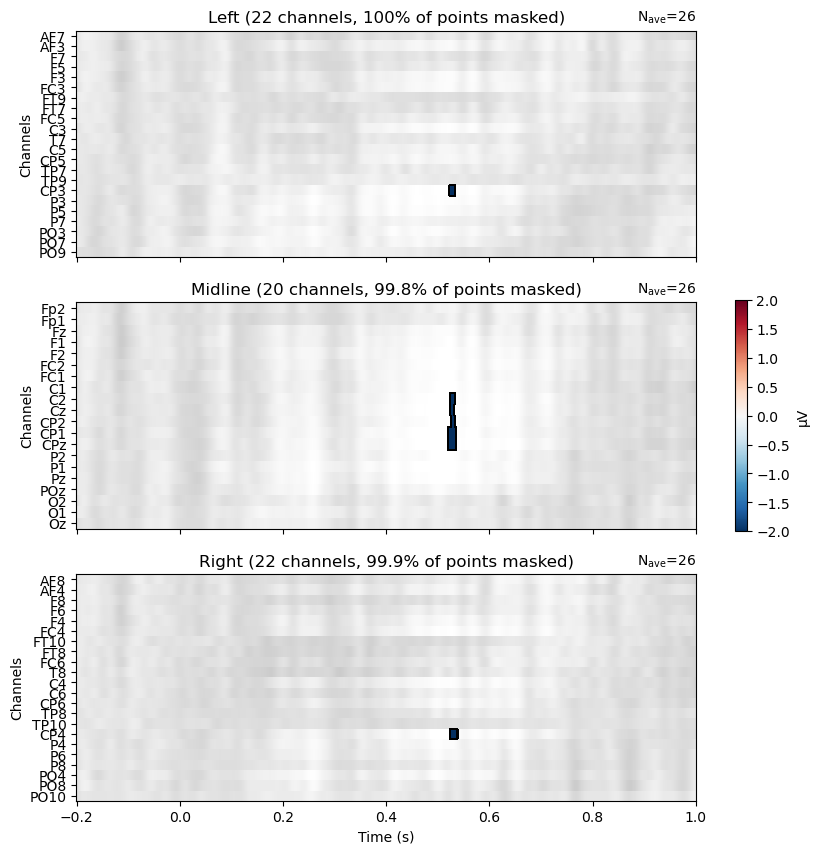

In [39]:
# stats output is time X chan, but ERP data is chan X time, so transpose
mask = cluster_pv_tfce.reshape(t_tfce.shape).T < .05

fig, axes = plt.subplots(nrows=3, figsize=(10, 10))
axes = {sel: ax for sel, ax in zip(selections, axes.ravel())}
mne.grand_average(diff_waves).plot_image(axes=axes,
                            group_by=selections,
                            colorbar=False,
                            show=False,
                            mask=mask,
                            show_names="all",
                            titles=None,
                            **time_unit,
                            clim = dict(eeg=[-2, 2])
                            )
plt.colorbar(axes["Left"].images[-1], ax=list(axes.values()), shrink=0.3, label="µV")

plt.show()

<div class="alert alert-block alert-warning">
<b>Discussion:</b> 

Are the tests giving different results? 

Yes, the cluster is way smaller and more centered around central-posterior electrodes

If so, why? 

TFCE tests different thresholds and can find smaller or bigger cluster
further we get a p-value for each voxel, representing the clusteredness of the voxel

</div> 

### Important: 

## How NOT to interpret cluster-based permutation tests: 

## check out the [fieldtrip](https://www.fieldtriptoolbox.org/faq/how_not_to_interpret_results_from_a_cluster-based_permutation_test/) homepage and the paper by [Sassenhagen](https://doi.org/10.1111/psyp.13335)